In [1]:
import numpy as np
import pandas as pd

In [3]:
data = np.load('D://data/boston_housing.npz')

In [4]:
data.files

['y', 'x']

In [15]:
X = data['x']

In [17]:
Y = data['y']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state  = 1234)

In [20]:
y_train.shape

(354,)

In [23]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std


In [24]:
x_test -=mean
x_test /=std

In [39]:
#建立模型
from keras import models 
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation = 'relu',
                          input_shape = (x_train.shape[1],)))
    model.add(layers.Dense(64,activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop',loss = 'mse',metrics = ['mae'])
    return model


In [40]:
#k折交叉验证
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('验证集',i)
    val_data = x_train[i * num_val_samples:(i+1) * num_val_samples]
    val_targets  = y_train[i * num_val_samples:(i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
       [x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis = 0)
    partial_train_targets = np.concatenate(
       [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],axis = 0)
    
    model = build_model()
    model.fit(partial_train_data,partial_train_targets,epochs = num_epochs, batch_size = 1,verbose = 0)
    val_mse,val_mae = model.evaluate(val_data,val_targets, verbose = 0)
    all_scores.append(val_mae)

验证集 0
验证集 1
验证集 2
验证集 3


In [41]:
all_scores

[2.5041208267211914,
 2.8609941005706787,
 2.5286829471588135,
 2.9644968509674072]

In [43]:
np.mean(all_scores)

2.7145736813545227

In [48]:
#500轮
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('正在处理中....',i)
    val_data = x_train[i * num_val_samples:(i+1) * num_val_samples]
    val_targets  = y_train[i * num_val_samples:(i+1) * num_val_samples]
    partial_train_data = np.concatenate(
       [x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis = 0)
    partial_train_targets = np.concatenate(
       [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,epochs = num_epochs, batch_size = 1,verbose = 0)
    mae_history = history.history['mae']
    
    all_mae_histories.append(mae_history)

正在处理中.... 0
正在处理中.... 1
正在处理中.... 2
正在处理中.... 3


In [46]:
print(history.history.keys())

dict_keys(['loss', 'mae'])


In [49]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
    
]

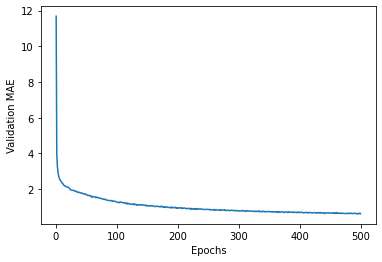

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()



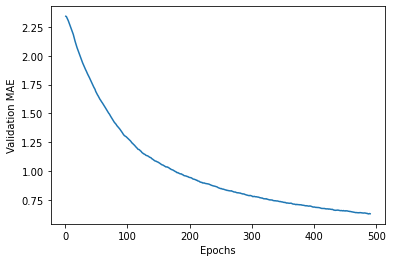

In [54]:
def smooth_curve(points,factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
            
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history =  smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smooth_mae_history) + 1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [55]:
test_mse_score,test_mae_score = model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 300608.6562 - mae: 487.1461


In [57]:
test_mse_score

300608.65625

In [59]:
model = build_model()
model.fit(x_train,y_train,
         epochs = 80,batch_size = 16,verbose  = 0)
t1,t2 = model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 4247695.0000 - mae: 2045.4420


In [61]:
t2

2045.4420166015625

In [62]:
# 留出验证集合
num_validation_samples = 10000
np.random.shuffle(data) #打乱数据
validation_data = data[:num_validation_samples]#验证集
data = data[num_validation_samples:] #取出训练集

training_data = data[:] #训练集
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)
#调节 训练 评估 再次调节

model = get_model()
model.train(np.concatenate([training_data,validation_data]))

test_score = model.evaluate(test_data)



KeyError: '0 is not a file in the archive'

In [ ]:
#k折交叉验证
k = 4 
num_validation_samples = len(data) // k#分出区域
np.random.shuffle(data)#打乱数据

validataion_scores = []

for fold in range(k):
    validataion_data = data[num_validation_samples * fold:
    num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] + 
    data[num_validation_samples * (fold + 1):]
    model = get_model()
    model.train(training_data)
    validataion_score =  model.evaluate(validataion_data)
    
    validataion_scores.append(validataion_score)
validataion_score = np.average(validataion_scores)

model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

In [ ]:
from keras import mini

120